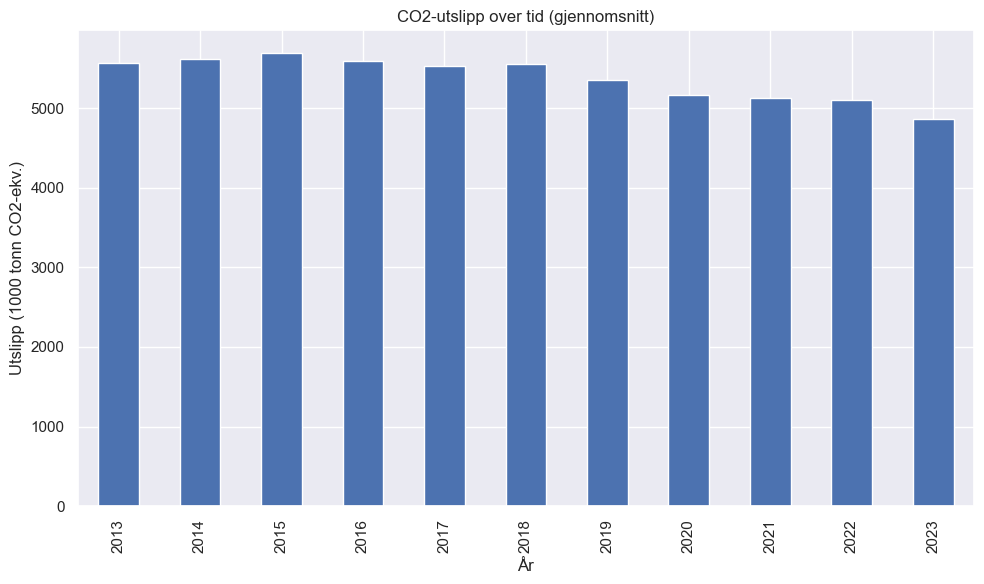

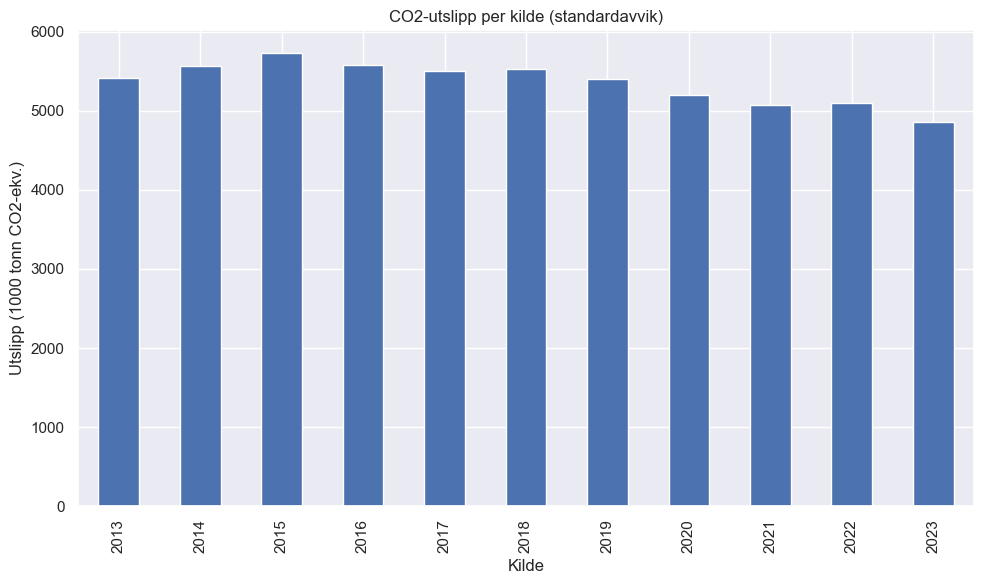

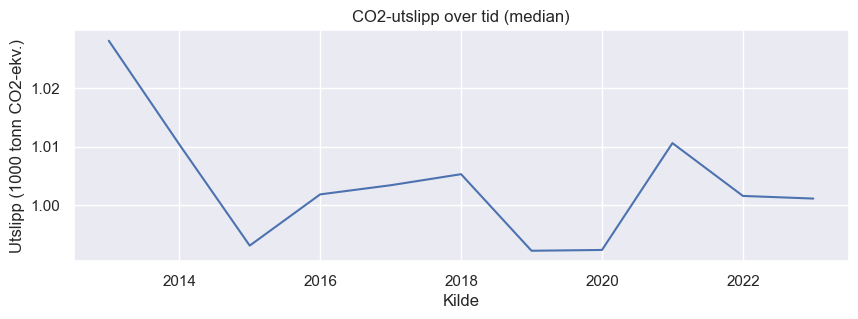

In [ ]:
import sys
sys.path.append("../src")

from Utslipp import analyze_clean_utslipp_data, plots


file_path_utslipp = "../raw_data/data/Utslippdata.csv"
df = pd.read_csv(file_path_utslipp)

df_clean = analyze_clean_utslipp_data(df)
plotter = plots(df_clean)


mean = plotter.plot_co2_per_year_mean()
std = plotter.plot_co2_per_year_std()
cv = plotter.comparisons(mean, std)